In [16]:
#loading data onto ipynb file
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [34]:
import matplotlib.pyplot as plt
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from pathlib import Path
from collections import Counter

train_data_path = '/content/Dataset/train'
for root, dir, files in os.walk(train_data_path):
  for dir_name in dir:
    print(f'Subfolder: {dir_name}')

Subfolder: Systemic Disease
Subfolder: Light Diseases and Disorders of Pigmentation
Subfolder: Exanthems and Drug Eruptions
Subfolder: Warts Molluscum and other Viral Infections
Subfolder: Poison Ivy Photos and other Contact Dermatitis
Subfolder: Eczema Photos
Subfolder: Cellulitis Impetigo and other Bacterial Infections
Subfolder: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Subfolder: Herpes HPV and other STDs Photos
Subfolder: Melanoma Skin Cancer Nevi and Moles
Subfolder: Tinea Ringworm Candidiasis and other Fungal Infections
Subfolder: Vasculitis Photos
Subfolder: Acne and Rosacea Photos
Subfolder: Psoriasis pictures Lichen Planus and related diseases
Subfolder: Seborrheic Keratoses and other Benign Tumors
Subfolder: Lupus and other Connective Tissue diseases
Subfolder: Urticaria Hives
Subfolder: Atopic Dermatitis Photos
Subfolder: Vascular Tumors


In [18]:
for root, dir, files in os.walk(train_data_path):
  for filename in files:
    if filename.lower().endswith(('jpg', 'jpeg')):
      print(f'Image name : {os.path.join(root, filename)}')

Image name : /content/Dataset/train/Systemic Disease/cowden-disease-5.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-35.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-13.jpg
Image name : /content/Dataset/train/Systemic Disease/acanthosis-nigricans-39.jpg
Image name : /content/Dataset/train/Systemic Disease/lipoid-proteinosis-8.jpg
Image name : /content/Dataset/train/Systemic Disease/tuberous-sclerosis-33.jpg
Image name : /content/Dataset/train/Systemic Disease/pretibial-myxedema-4.jpg
Image name : /content/Dataset/train/Systemic Disease/hypothyroidism-3.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-6.jpg
Image name : /content/Dataset/train/Systemic Disease/lipoid-proteinosis-7.jpg
Image name : /content/Dataset/train/Systemic Disease/trichoepithelioma-1.jpg
Image name : /content/Dataset/train/Systemic Disease/26BirtHoggDube0911062.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-38.jpg
Image name : /content/D

Training class distribution
Acne and Rosacea Photos: 840 images
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 322 images
Atopic Dermatitis Photos: 100 images
Cellulitis Impetigo and other Bacterial Infections: 65 images
Eczema Photos: 35 images
Exanthems and Drug Eruptions: 20 images
Herpes HPV and other STDs Photos: 40 images
Light Diseases and Disorders of Pigmentation: 299 images
Lupus and other Connective Tissue diseases: 90 images
Melanoma Skin Cancer Nevi and Moles: 24 images
Poison Ivy Photos and other Contact Dermatitis: 62 images
Psoriasis pictures Lichen Planus and related diseases: 62 images
Seborrheic Keratoses and other Benign Tumors: 80 images
Systemic Disease: 81 images
Tinea Ringworm Candidiasis and other Fungal Infections: 122 images
Urticaria Hives: 3 images
Vascular Tumors: 101 images
Vasculitis Photos: 15 images
Warts Molluscum and other Viral Infections: 248 images


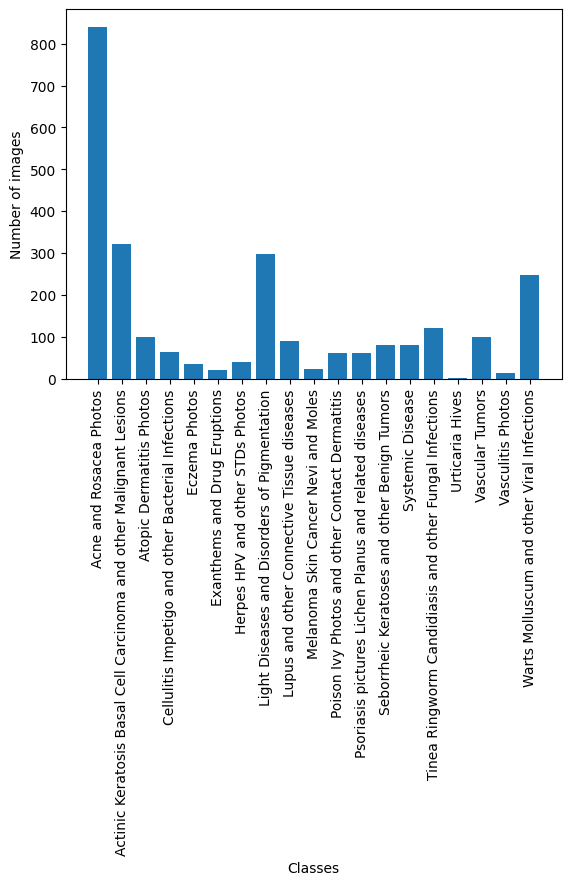

Text(0, 0.5, 'Number of images')

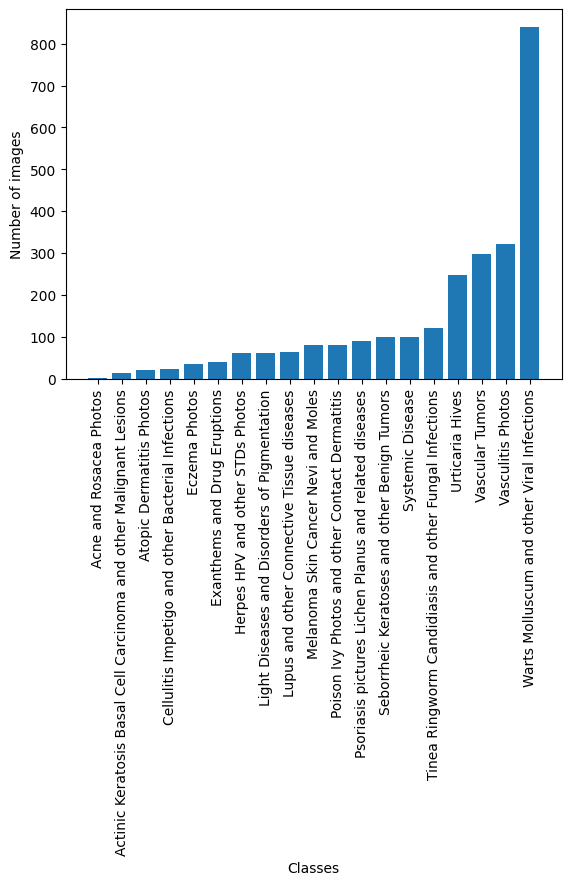

In [33]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
train_class_counts = Counter(train_dataset.targets)
sorted_train_class_counts = sorted(train_class_counts.items(), key=lambda x: x[1])
class_names = [train_dataset.classes[class_id] for class_id, _ in sorted_train_class_counts]
class_sizes = [count for _, count in sorted_train_class_counts]
print("Training class distribution")
for class_id, count in train_class_counts.items():
  print(f"{train_dataset.classes[class_id]}: {count} images")

plt.figure()
plt.bar(train_class_counts.keys(), train_class_counts.values(), tick_label = [train_dataset.classes[i] for i in train_class_counts.keys()])
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.xticks(rotation=90)
plt.show()
plt.bar(class_names, class_sizes, tick_label = [train_dataset.classes[i] for i in train_class_counts.keys()])
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of images")

In [25]:
min_count = min(train_class_counts.values())
max_count = max(train_class_counts.values())
balance_ratio = min_count / max_count
print(f'Class balance ratio is: {balance_ratio}')

Class balance ratio is: 0.0035714285714285713


In [35]:
def calculate_mean_std(dataset, loader):
    mean = 0.0
    std = 0.0
    total_images = 0

    for images, _ in loader:
        batch_samples = images.size(0)  # Batch size
        images = images.view(batch_samples, images.size(1), -1)  # Flatten to (batch, channels, width*height)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images += batch_samples

    mean /= total_images
    std /= total_images
    return mean, std

# Calculate mean and standard deviation for the training dataset
train_mean, train_std = calculate_mean_std(train_dataset, train_loader)
print(f"Training dataset - Mean: {train_mean}, Std: {train_std}")

Training dataset - Mean: tensor([0.5476, 0.4051, 0.3776]), Std: tensor([0.1778, 0.1475, 0.1424])
